# Project 06 - Anthony Micco

**TA Help:** N/A
    
**Collaboration:** Utilized stackoverflow link provided by Dr. Ward to understand how to accommodate for leading zeros and the pandas documentation to understand how to use pd.concat on Question 1. On Question 2, I used the provided GeeksForGeeks page to learn how to extract the month using dateTime. 

## Question 1

In [4]:
import pandas as pd

# Base URL
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_"

# Creating DataFrames for each month from January to November 2024
dfs = [pd.read_parquet(f"{base_url}2024-{month:02d}.parquet") for month in range(1, 12)]

In [7]:
taxiDF = pd.concat(dfs, ignore_index=True)

In [8]:
taxiDF

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606219,2,2024-11-30 18:03:00,2024-11-30 18:24:00,None,NaN,41,143,NaN,4.10,30.46,0.0,0.0,1.69,0.0,NaN,1.0,35.90,NaN,NaN,NaN
606220,2,2024-11-30 19:05:00,2024-11-30 19:16:00,None,NaN,66,256,NaN,2.78,18.27,0.0,0.5,3.95,0.0,NaN,1.0,23.72,NaN,NaN,NaN
606221,2,2024-11-30 19:52:00,2024-11-30 20:03:00,None,NaN,260,223,NaN,2.38,17.01,0.0,0.5,1.85,0.0,NaN,1.0,20.36,NaN,NaN,NaN
606222,2,2024-11-30 20:21:00,2024-11-30 20:31:00,None,NaN,244,238,NaN,4.21,20.62,0.0,0.5,7.46,0.0,NaN,1.0,32.33,NaN,NaN,NaN


## Question 2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Make sure the datetime column is in the correct format
taxiDF["lpep_pickup_datetime"] = pd.to_datetime(taxiDF["lpep_pickup_datetime"])

# Extract the month and calculate the average total_amount per month
monthly_avg = taxiDF.groupby(taxiDF["lpep_pickup_datetime"].dt.month)["total_amount"].mean()

monthly_avg

lpep_pickup_datetime
1     22.403046
2     22.635016
3     22.904555
4     23.364153
5     24.574983
6     24.859574
7     24.762476
8     25.970446
9     26.677182
10    25.032549
11    24.191490
12    17.516000
Name: total_amount, dtype: float64

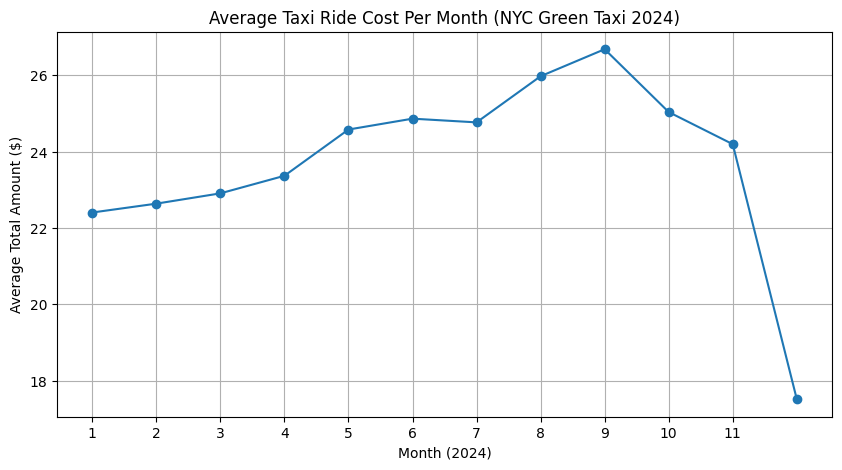

In [11]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel("Month (2024)")
plt.ylabel("Average Total Amount ($)")
plt.title("Average Taxi Ride Cost Per Month (NYC Green Taxi 2024)")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

## Question 3

In [13]:
#imports
import requests
from lxml import html
from IPython.display import Image, display

In [16]:
#defining function
def getPeanutsComic(month,monthNum,day,year):
    myMonth = month
    myMonthNum = str(monthNum)
    myDay = str(day)
    myYear = str(year)
    url = "https://www.gocomics.com/peanuts/" + myYear + "/" + myMonthNum + "/" + myDay
    myresponse = requests.get(url)
    mytree = html.fromstring(myresponse.content)
    image = [element.attrib['src'] for element in mytree.xpath('//img[@alt = "Peanuts Comic Strip for ' + myMonth + ' ' + myDay + ', ' + myYear + ' "]')]
    display(Image(url=image[0]))
    

In [17]:
getPeanutsComic("February", "02", "18","2003")

## Question 4

In [20]:
import time

In [24]:
#re-defining function
def getPeanutsComic(month,monthNum,day,year):
    myMonth = month
    myMonthNum = str(monthNum).zfill(2)
    myDay = str(day).zfill(2)
    myYear = str(year)
    url = "https://www.gocomics.com/peanuts/" + myYear + "/" + myMonthNum + "/" + myDay
    myresponse = requests.get(url)
    mytree = html.fromstring(myresponse.content)
    image = [element.attrib['src'] for element in mytree.xpath('//img[@alt = "Peanuts Comic Strip for ' + myMonth + ' ' + myDay + ', ' + myYear + ' "]')]
    display(Image(url=image[0]))
    time.sleep(2)

In [25]:
for day in range(18, 21):
    getPeanutsComic("February", "02", day, "2003")

## Question 5

In [23]:
for day in range(1, 32):
    getPeanutsComic("December", "12", day, "2000")   

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.